# Random Forest

Tata cara:
- Misal dataset: 10000 data & 6 features
- Dataset splitting => 8500 training & 1500 testing
- Buat Bagging/Bootstrapped Data dari data training sebanyak dataset asli
    - 10000 data, diambil dari 8500 training secara random & boleh berulang
- Buat beberapa decision tree: 1 feature, 2 feature, 3 feature random
- Ulangi lagi mulai dari step Bootstrapped data, sampai tercapai jumlah decision tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'ujian': [0, 0, 0, 1, 1, 1],
    'lulus': [0, 0, 0, 0, 1, 1]
})
df

,ujian,lulus
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1
5,1,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [5]:
model = RandomForestClassifier(n_estimators=10)

In [6]:
model.fit(df[['ujian']], df['lulus'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
print(model.n_estimators)
# print(model.estimators_[0])
for i in range(model.n_estimators):
    print(model.estimators_[i])

10
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=992193079, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1995815122, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='

In [13]:
# plot decision trees

for i in range(model.n_estimators):
    export_graphviz(
        model.estimators_[i].fit(df[['ujian']], df['lulus']),
        feature_names = ['Ujian'],
        class_names = ['Tak Lulus', 'Lulus'],
        out_file = f'tree{i+1}.dot',
        rounded=True, filled=True
    )

- 6th Decision Tree

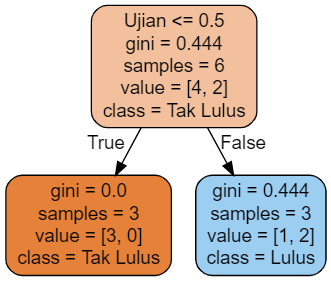

In [14]:
model.predict(df[['ujian']])

array([0, 0, 0, 1, 1, 1], dtype=int64)

<hr>

### Random Forest on Iris Dataset

In [15]:
from sklearn.datasets import load_iris

In [18]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [25]:
dfIris = pd.DataFrame(
    data['data'],
    columns = ['SL', 'SW', 'PL', 'PW']
)
dfIris['target'] = data['target']
dfIris['jenis'] = dfIris['target'].apply(lambda x: data['target_names'][x])
dfIris.tail(3)

,SL,SW,PL,PW,target,jenis
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [27]:
model = RandomForestClassifier(n_estimators=100)
model.fit(dfIris[['SL', 'SW', 'PL', 'PW']], dfIris['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# prediksi
dfIris['prediksi'] = model.predict(dfIris[['SL', 'SW', 'PL', 'PW']])
dfIris.head(3)

,SL,SW,PL,PW,target,jenis,prediksi
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0


In [32]:
# prediksi != target aktual
dfIris[dfIris['target'] != dfIris['prediksi']]

,SL,SW,PL,PW,target,jenis,prediksi


In [33]:
# plot salah satu decision tree dalam random forest

export_graphviz(
    model.estimators_[99].fit(dfIris[['SL', 'SW', 'PL', 'PW']], dfIris['target']),
    feature_names = ['SL', 'SW', 'PL', 'PW'],
    class_names = ['Setosa', 'Versicolor', 'Virginica'],
    out_file = 'iris.dot',
    rounded=True, filled=True
)

- $100^\textrm{th}$ Decision Tree

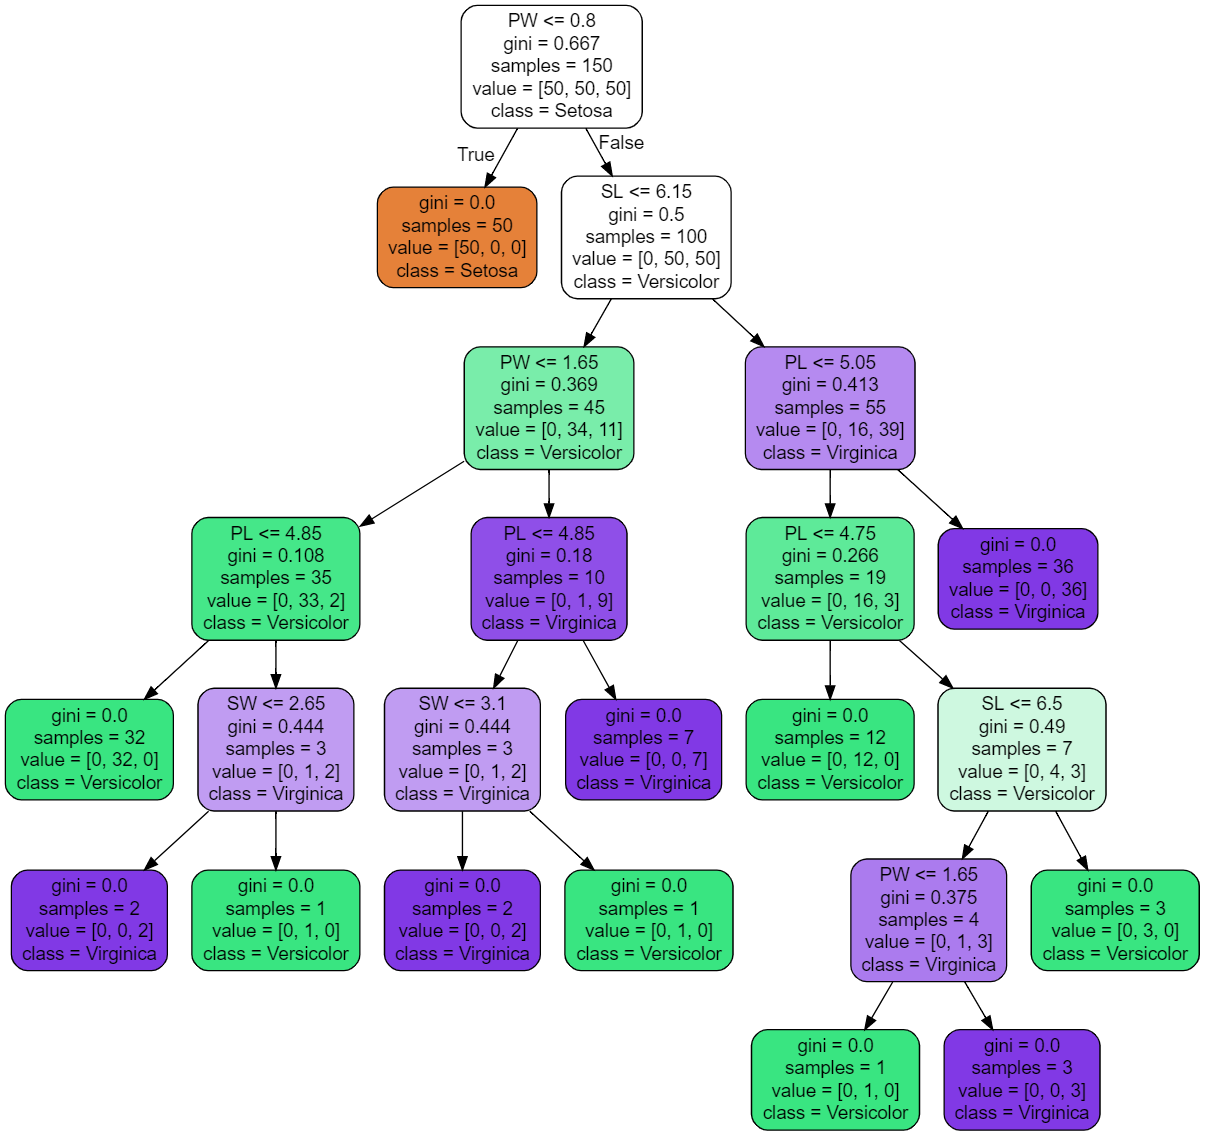